In [2]:
from google.colab import files
uploaded = files.upload()

Saving seeds_dataset.txt to seeds_dataset.txt


In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, Normalizer, MinMaxScaler
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [4]:
column_names = ["area A",
"perimeter P",
"compactness C",
"length of kernel",
"width of kernel",
"asymmetry coefficient",
"length of kernel groove",
"seed-type"]

data = pd.read_csv("seeds_dataset.txt", names = column_names,delim_whitespace=True)

In [5]:
data.head()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,seed-type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area A                   210 non-null    float64
 1   perimeter P              210 non-null    float64
 2   compactness C            210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   seed-type                210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [7]:
y = data['seed-type']

In [8]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 210 entries, 0 to 209
Series name: seed-type
Non-Null Count  Dtype
--------------  -----
210 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [9]:
X = data.iloc[:,:7]

# **1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

In [10]:
X.head()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [116]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area A                   210 non-null    float64
 1   perimeter P              210 non-null    float64
 2   compactness C            210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [117]:
X.isnull().sum()

area A                     0
perimeter P                0
compactness C              0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
dtype: int64

There are no null values in the dataset

Statistical values of each feature

In [118]:
X.describe()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


Value distribution for each of the attribute

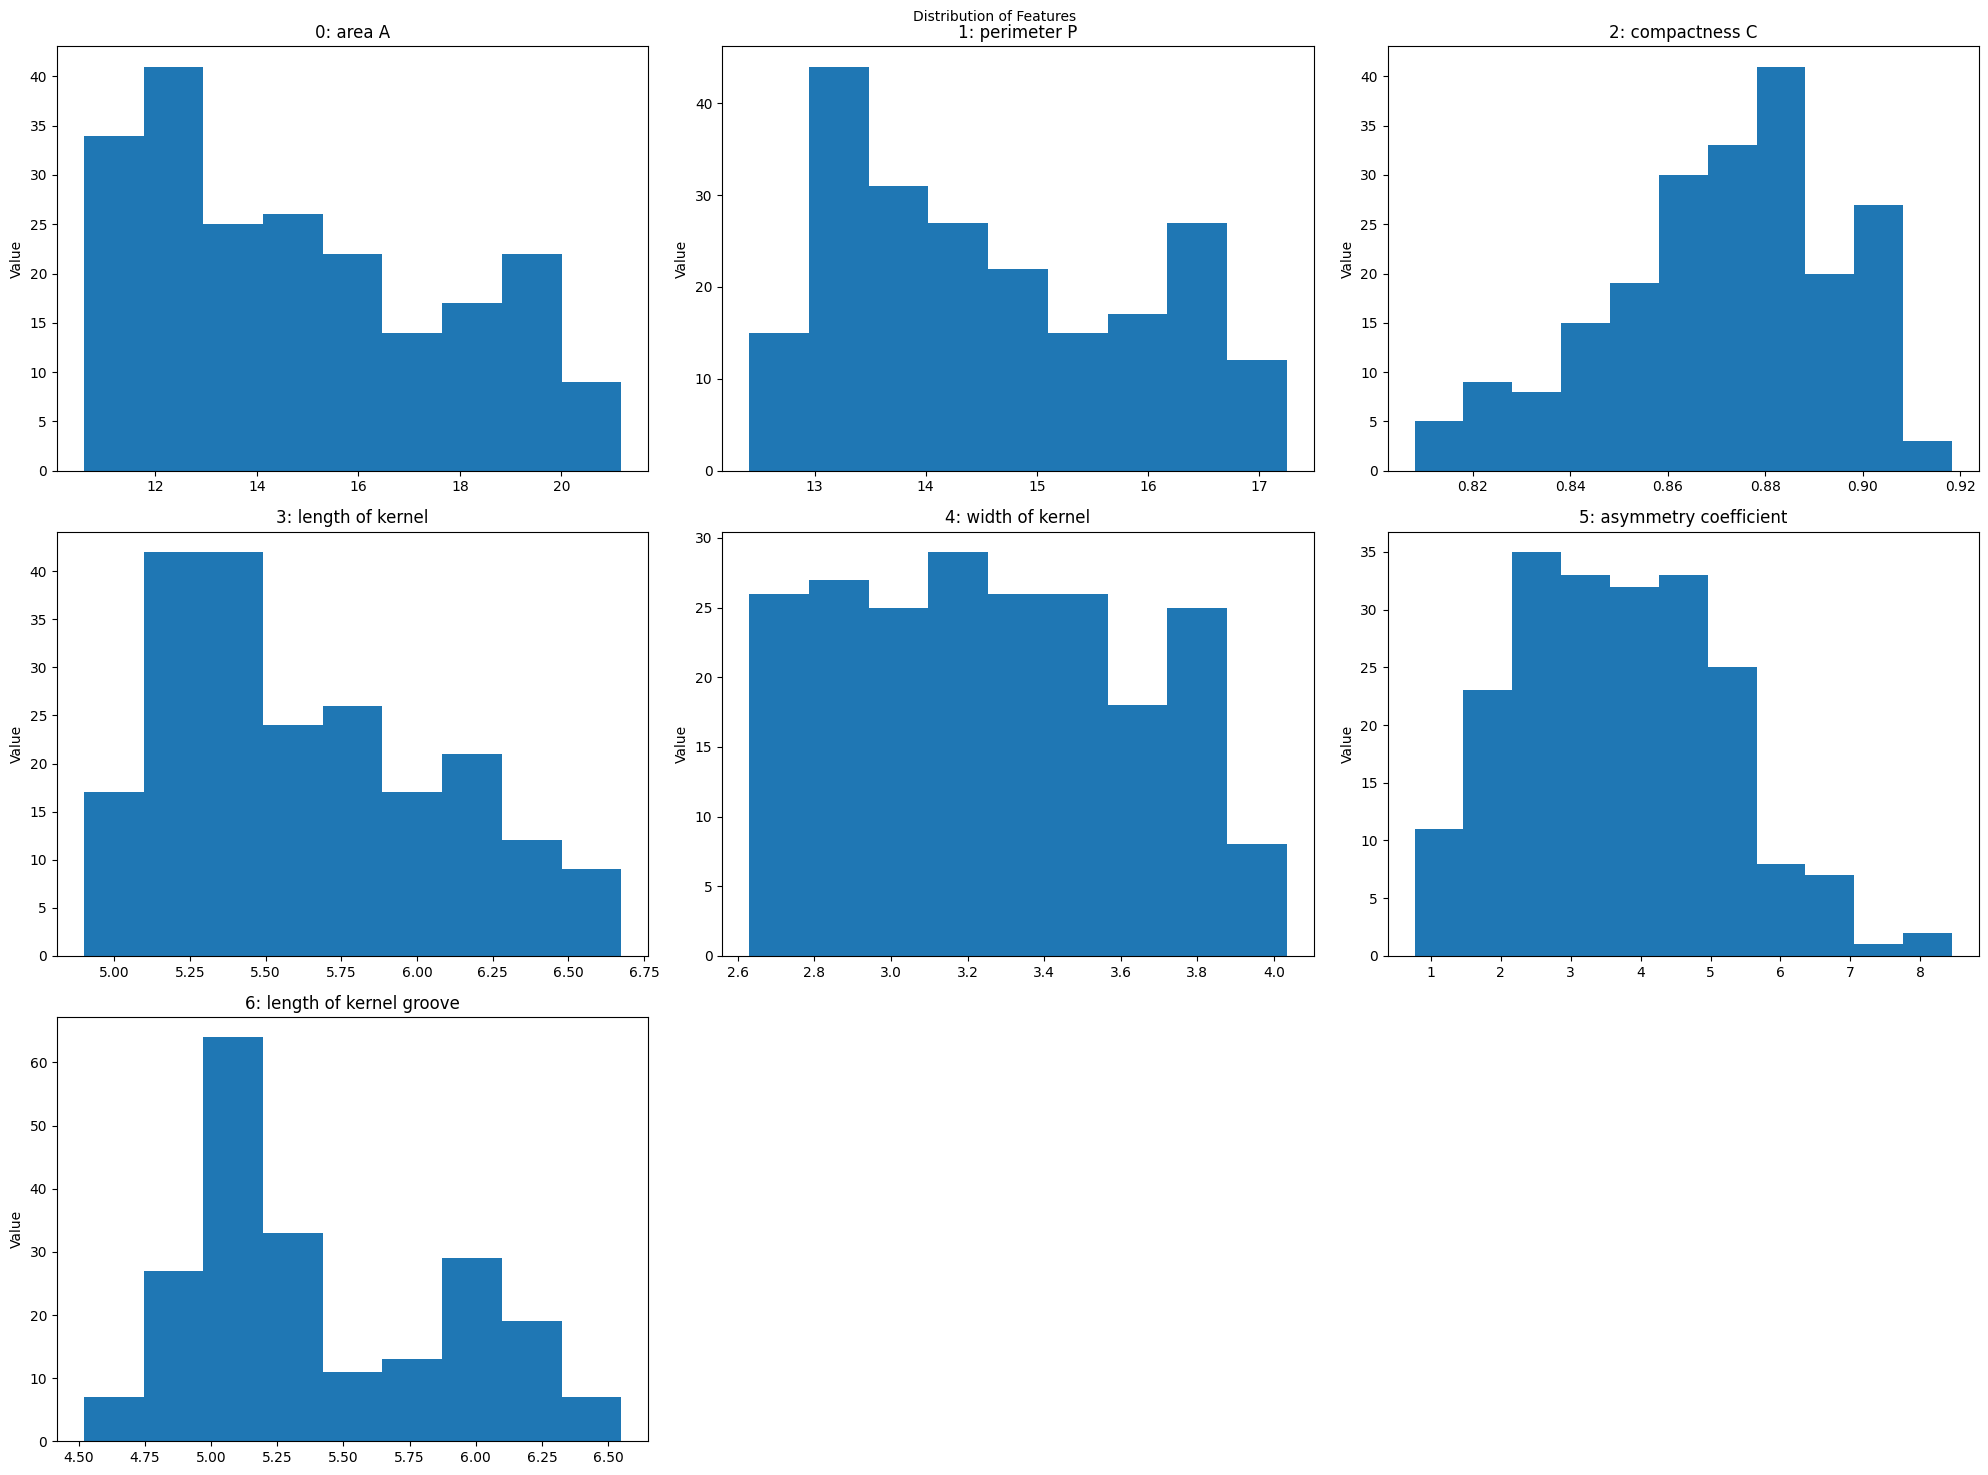

In [119]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
for i, ax in enumerate(axes.ravel()):
    if i == 7:
      break
    ax.hist(X.iloc[:,i],bins="auto")
    ax.set_title("{}: {}".format(i,column_names[i] ))
    ax.set_ylabel("Value")
fig.suptitle("Distribution of Features", fontsize=10)
plt.tight_layout()
plt.show()

# Special Treatment

1) From the statistical distribution and histograms the dataset looks evenly distributed. Comparison of the 75th percentile and max value shows that there are no outliers in the data set. At the same time the difference between the min and max values is also not a lot. For sepcial treatment we can use standard scaling.

# **2. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

#1) PCC for relationship between the X features
 Following figure gives the relationship between data attributes.

Text(0.5, 1.0, 'Pearson Correlation Coefficients')

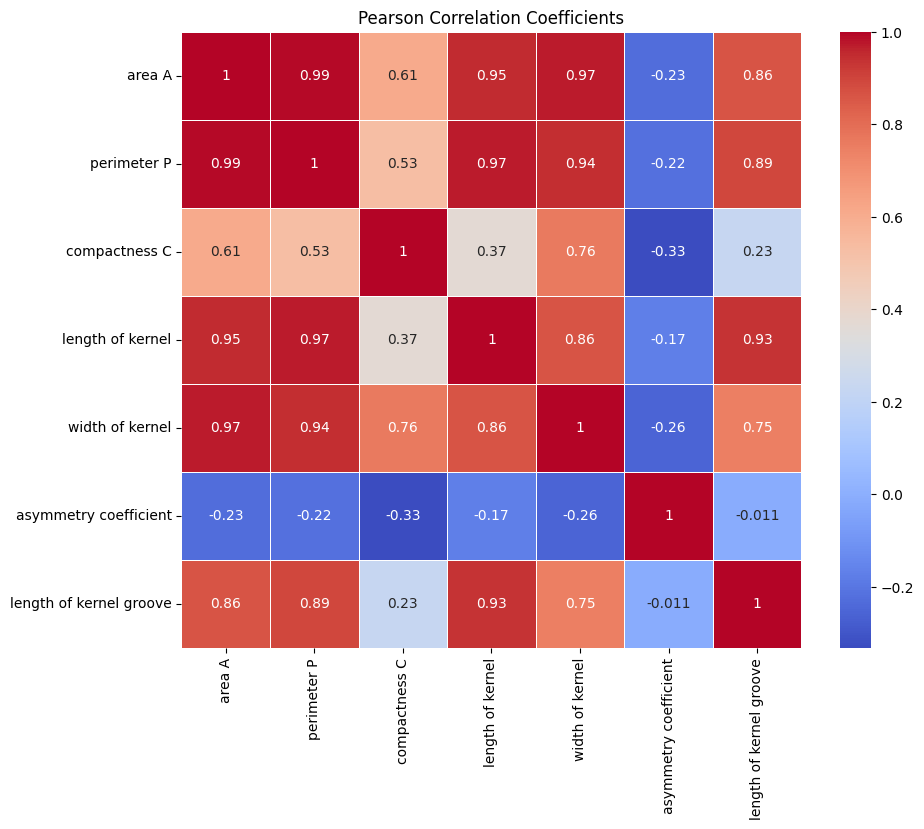

In [132]:
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Coefficients')

Following features have high co-relation:
*  length of kernel groove- area A
*  length of kernel groove- perimeter P
*  lenght of kernel groove- length of kernel
*  width of kernel- area A
*  width of kernel- perimeter P
*  width of kernel- length of kernel
*  length of kernel- area A
*  length of kernel- perimeter P
*  perimeter p- area A

#2) PCC for the relationship between the data attributed and the Label
Following figure gives the relationship between data attributes and label.


Text(0.5, 1.0, 'Pearson Correlation Coefficients')

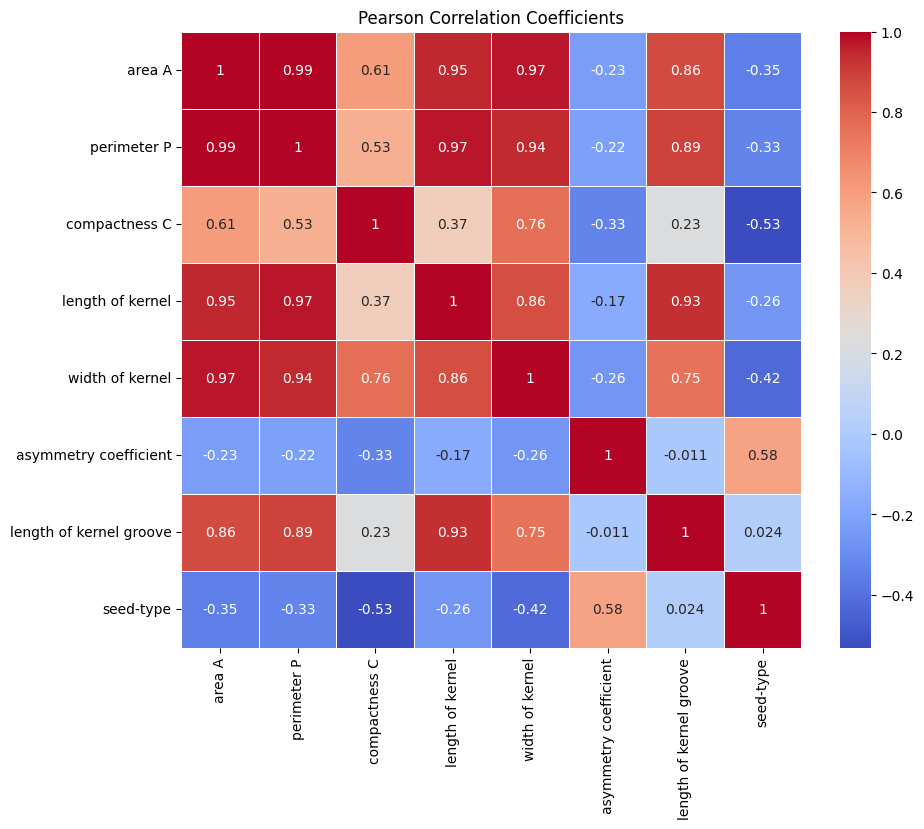

In [131]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Coefficients')

#Discussion

Even though not close to 1 or -1, following features have high co-relation with label as compared to others features.
*  compactness- 0.53
*  asymmetry coefficient- 0.58

#Scatter plots

Distribution of each feature against label

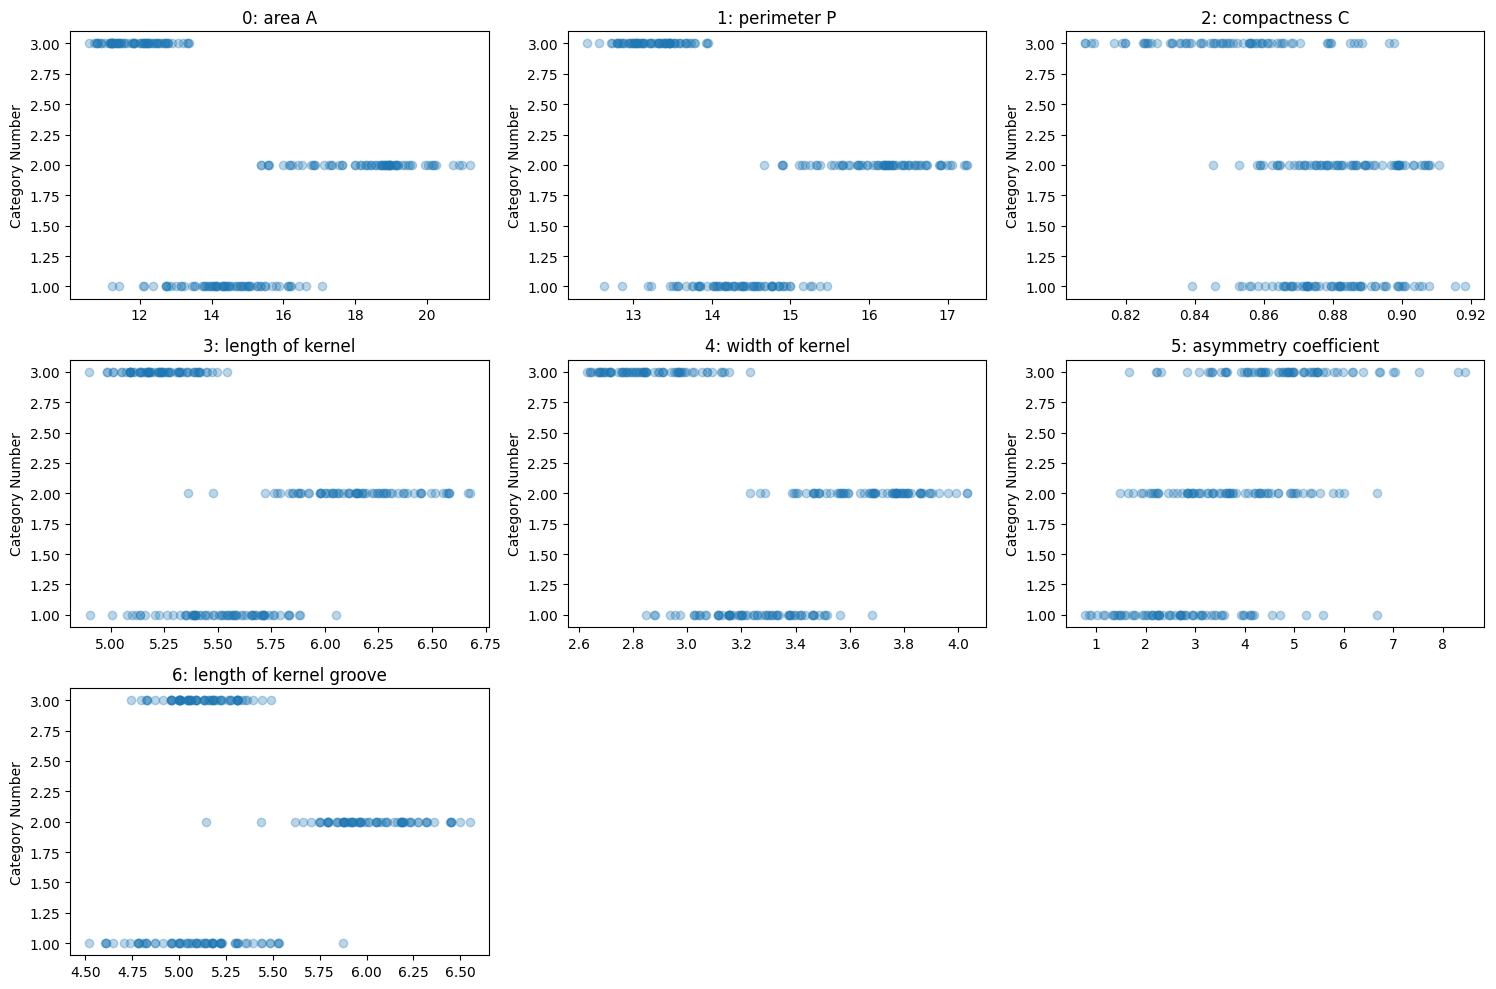

In [133]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
for i, ax in enumerate(axes.ravel()):
    if i ==7:
      break
    ax.plot(X.iloc[:,i], y, 'o', alpha=.3)
    ax.set_title("{}: {}".format(i, column_names[i]))
    ax.set_ylabel("Category Number")
plt.tight_layout()
plt.show()

In [123]:
scaling = StandardScaler()

cols = X.columns
inx = X.index
X_S = pd.DataFrame(scaling.fit_transform(X), index =inx, columns=cols)

## **3. Select 20% of the data for testing and 20% for validation and use the remaining 60% of the data for training. Describe how you did that and verify that your test and validation portions of the data are representative of the entire dataset**

# 1) Splitting the Dataset

In [124]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

I have made use of train_test_split from sklearn.model_selection to split the data set. We use a temporary variable to split the data between validation and test dataset.

# 2) Verifying if the Test and Validation sets are representative of data

In [125]:
X_train.describe()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,14.841667,14.570635,0.868726,5.641698,3.254476,3.726564,5.424175
std,2.986032,1.327810,0.024952,0.437848,0.393688,1.488117,0.479743
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.222500,13.470000,0.853125,5.317500,2.900500,2.652000,5.063000
50%,14.380000,14.405000,0.871950,5.549500,3.250000,3.684500,5.270000
75%,17.477500,15.715000,0.886775,5.979750,3.562750,4.768750,5.877000
max,21.180000,17.250000,0.910800,6.666000,4.033000,7.524000,6.498000


In [126]:
X_valid.describe()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,15.393810,14.784762,0.875948,5.676524,3.333333,3.425381,5.447571
std,3.002961,1.371204,0.021755,0.494662,0.371582,1.608221,0.543797
min,11.020000,12.870000,0.818900,5.053000,2.701000,0.903000,4.649000
25%,12.715000,13.410000,0.864050,5.209750,3.107000,2.163250,5.013250
50%,15.020000,14.765000,0.880450,5.652000,3.390000,3.168000,5.169500
75%,18.410000,16.112500,0.889300,6.132000,3.651000,4.286000,5.955750
max,20.200000,17.030000,0.915300,6.675000,3.930000,8.456000,6.550000


In [127]:
X_test.describe()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,14.318810,14.299762,0.872867,5.541048,3.196262,3.895931,5.320262
std,2.522635,1.147658,0.020741,0.400963,0.326957,1.437827,0.472902
min,10.910000,12.800000,0.825300,5.008000,2.668000,0.855100,4.607000
25%,12.407500,13.445000,0.862800,5.228500,2.969000,2.921500,5.039750
50%,13.410000,13.890000,0.873800,5.425500,3.140500,3.635000,5.145000
75%,15.962500,14.985000,0.884975,5.826750,3.470250,4.810250,5.670250
max,18.950000,16.490000,0.918300,6.445000,3.860000,8.315000,6.362000


By using the dataframe.describe function we can check whether the dataset splits are representative of the entire dataset.

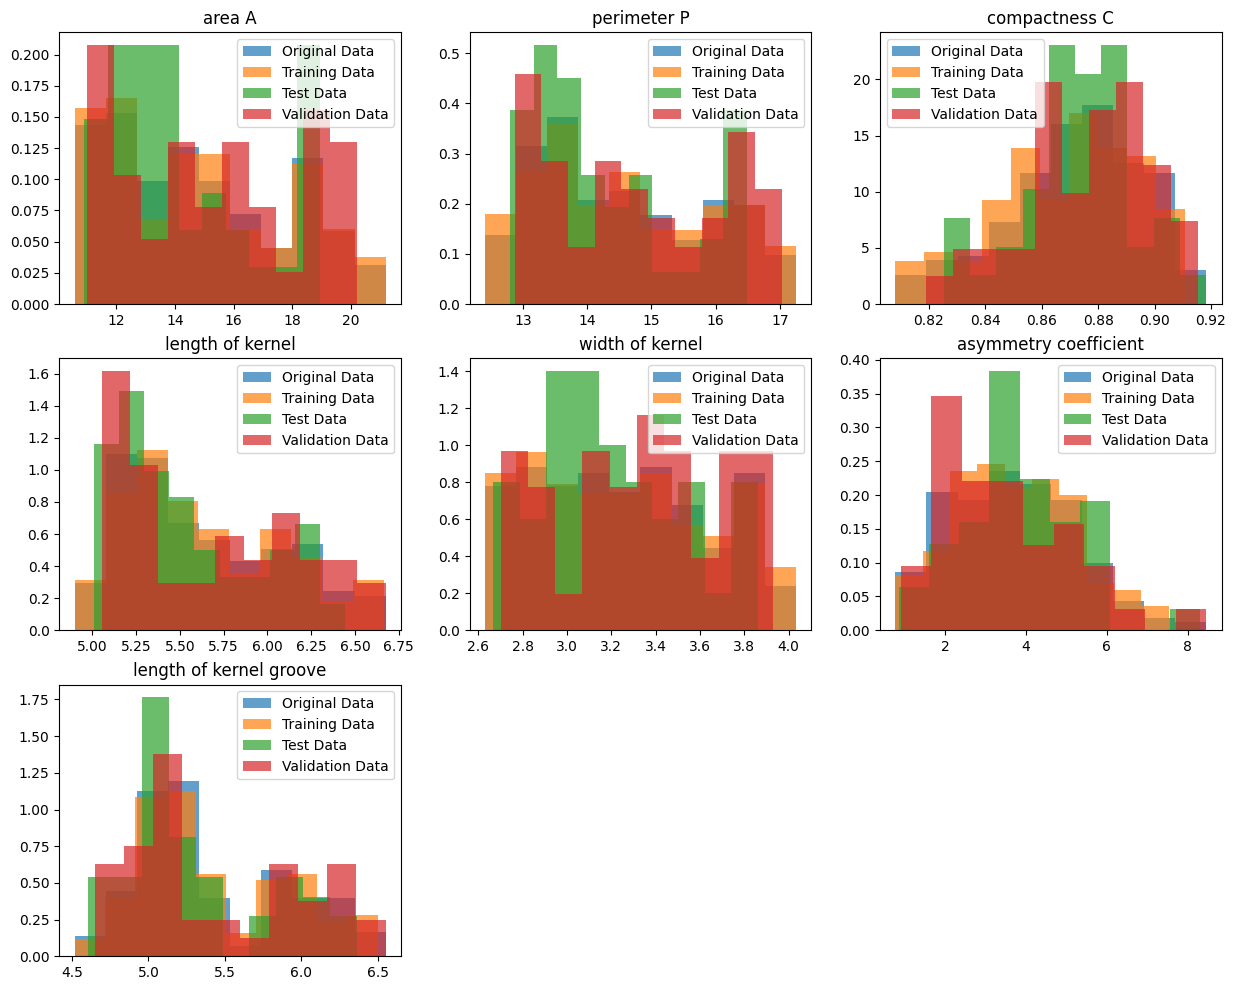

In [139]:
fig, axes = plt.subplots(3,3, figsize=(15, 12))
axes = axes.ravel()
fig.delaxes(axes[7])
fig.delaxes(axes[8])
for i, cols in enumerate(X.columns):
    ax = axes[i]
    data_sets = [X[cols], X_train[cols], X_test[cols], X_valid[cols]]
    labels = ["Original Data", "Training Data", "Test Data", "Validation Data"]

    for data, label in zip(data_sets, labels):
        ax.hist(data, alpha=0.7, label=label, density=True)

    ax.legend()
    ax.set_title(cols)

#**Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):**
*  **Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations.**
*  **Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.**
*  **Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node**

To try the different values if hyperparameters I have made use of Grid Search. And the displayed classification report is based on the best hyperparameter values given by GridSearchCV. This is true for every model that we were asked to implement.

In [129]:
def evaluate_model(model, x, y):
    y_pred = model.predict(x)
    print(classification_report(y_pred, y))

The function is used to evaluate the model.

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from  sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Parameter grid for GridSearch

In [87]:
param_grid_log = {
    'C': [ 0.05, 0.07, 0.1, 0.5, 1],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [50, 100,200, 500]
}

param_grid_svm = {
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1,3, 5,10],
    'kernel': ['linear', 'sigmoid', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

param_grid_poly = {
    'kernel': ['poly'],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1,3, 5,10],
    'degree': [2, 3, 4],
    'coef0': [0, 1],
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## Multinomial Logistic Regression

In [96]:
logistic_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)


grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid_log, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_params)

print("Training")
evaluate_model(best_model, X_train, y_train)

print("Validation")
evaluate_model(best_model, X_valid, y_valid)

print("Testing")
evaluate_model(best_model, X_test, y_test)

{'C': 0.05, 'max_iter': 50, 'solver': 'lbfgs'}
Training
              precision    recall  f1-score   support

           1       0.88      0.90      0.89        41
           2       0.95      0.95      0.95        41
           3       0.95      0.93      0.94        44

    accuracy                           0.93       126
   macro avg       0.93      0.93      0.93       126
weighted avg       0.93      0.93      0.93       126

Validation
              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.94      0.94      0.94        17
           3       0.92      1.00      0.96        11

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42

Testing
              precision    recall  f1-score   support

           1       0.73      0.85      0.79        13
           2       0.92      1.00      0.96        11


Optimization Algorithms for Logistic Regression:

'newton-cg': Uses Newton's method with conjugate gradient. Suitable for small to medium-sized, well-conditioned datasets.

'lbfgs': A quasi-Newton method, good for large datasets with limited memory.

'sag': Stochastic optimization algorithm, useful for large datasets with quick convergence.

'saga': An extension of SAG, suitable for various problems, especially with L1 (Lasso) or elastic-net regularization.

C (Regularization Parameter):

Controls regularization in logistic regression. Smaller C = stronger regularization, preventing overfitting (may lead to underfitting if too low). Larger C = weaker regularization, fitting training data closely (may lead to overfitting if too high).

max_iter (Maximum Number of Iterations):

Specifies the maximum optimization steps for logistic regression. Increase max_iter if the model is not converging.

## SVM

In [97]:
svm_classifier = SVC()


grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_params)

print("Training")
evaluate_model(best_model, X_train, y_train)

print("Validation")
evaluate_model(best_model, X_valid, y_valid)

print("Testing")
evaluate_model(best_model, X_test, y_test)

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Training
              precision    recall  f1-score   support

           1       0.95      0.98      0.96        41
           2       1.00      0.98      0.99        42
           3       0.98      0.98      0.98        43

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126

Validation
              precision    recall  f1-score   support

           1       1.00      0.87      0.93        15
           2       0.94      1.00      0.97        16
           3       0.92      1.00      0.96        11

    accuracy                           0.95        42
   macro avg       0.95      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42

Testing
              precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.92      1.00      0.96        11

In [98]:
svm_classifier = SVC()


grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_poly, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_params)

print("Training")
evaluate_model(best_model, X_train, y_train)

print("Validation")
evaluate_model(best_model, X_valid, y_valid)

print("Testing")
evaluate_model(best_model, X_test, y_test)

{'C': 3, 'coef0': 1, 'degree': 4, 'kernel': 'poly'}
Training
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        42
           2       0.98      0.98      0.98        41
           3       0.98      0.98      0.98        43

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126

Validation
              precision    recall  f1-score   support

           1       1.00      0.87      0.93        15
           2       0.94      1.00      0.97        16
           3       0.92      1.00      0.96        11

    accuracy                           0.95        42
   macro avg       0.95      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42

Testing
              precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.92      1.00      0.96      

Kernel Types in Scikit-Learn SVM:

'linear': Simple linear transformation, suitable for linearly separable data.

'sigmoid': Non-linear, uses the hyperbolic tangent function.

'rbf' (Radial Basis Function): Widely used non-linear kernel, captures complex non-linear patterns.

C (Regularization Parameter):

Small C emphasizes maximizing margin, useful for noisy data (soft-margin). Large C reduces margin, suitable for noise-free, well-separated data (hard-margin).

Gamma (Kernel Coefficient):

Small gamma results in a smoother, general decision boundary, helps prevent overfitting (suitable for large, well-separated datasets). Large gamma makes the decision boundary more flexible and better at capturing intricate patterns, but can lead to overfitting (suitable for smaller, complex datasets)

## Random Forest

In [99]:
random_forest_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid_rf, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_params)

print("Training")
evaluate_model(best_model, X_train, y_train)

print("Validation")
evaluate_model(best_model, X_valid, y_valid)

print("Testing")
evaluate_model(best_model, X_test, y_test)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training
              precision    recall  f1-score   support

           1       0.98      0.95      0.96        43
           2       1.00      0.98      0.99        42
           3       0.95      1.00      0.98        41

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126

Validation
              precision    recall  f1-score   support

           1       1.00      0.87      0.93        15
           2       0.94      1.00      0.97        16
           3       0.92      1.00      0.96        11

    accuracy                           0.95        42
   macro avg       0.95      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42

Testing
              precision    recall  f1-score   support

           1       0.73      0.69      0.71        16
           2

n_estimators:

The number of decision trees in the Random Forest. Increasing n_estimators generally improves model performance, but it may lead to longer training times. It helps reduce overfitting and provides more stable predictions.

max_depth:

The maximum depth of each decision tree in the Random Forest. A larger max_depth can lead to more complex trees that capture intricate patterns in the data, but it increases the risk of overfitting. Smaller values promote simpler trees, reducing the risk of overfitting.

min_samples_split:

The minimum number of samples required to split a node in a decision tree. A smaller min_samples_split results in more splits and finer-grained trees, which can lead to overfitting. A larger value enforces more samples in a node to allow a split, which can make the trees more robust against noise.

min_samples_leaf:

The minimum number of samples required to be in a leaf node of a decision tree. Smaller min_samples_leaf values result in more detailed leaves and risk overfitting. Larger values make the leaves more general and reduce the risk of overfitting.

## Feature Selection

Random Forest is a powerful ensemble learning algorithm that can be used for feature selection. Here's a concise theory of how it works:

Feature Importance Scores:

Random Forest calculates a feature importance score for each feature in the dataset. This score measures how much each feature contributes to the overall predictive accuracy of the model. Features that have a higher score are considered more important, while those with lower scores are less important

In [100]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [101]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

length of kernel groove    0.210409
perimeter P                0.202419
area A                     0.176145
width of kernel            0.161735
length of kernel           0.133085
asymmetry coefficient      0.063816
compactness C              0.052391
dtype: float64

"length of kernel groove" has the highest feature importance score (0.210409), suggesting it is the most influential feature in making predictions.

"perimeter P" is the second most important feature with a score of 0.202419.

"area A" follows with a score of 0.176145.

"width of kernel" has a score of 0.161735, making it the fourth most important feature.

"length of kernel" is less important with a score of 0.133085.

"asymmetry coefficient" and "compactness C" are less influential, with scores of 0.063816 and 0.052391, respectively.

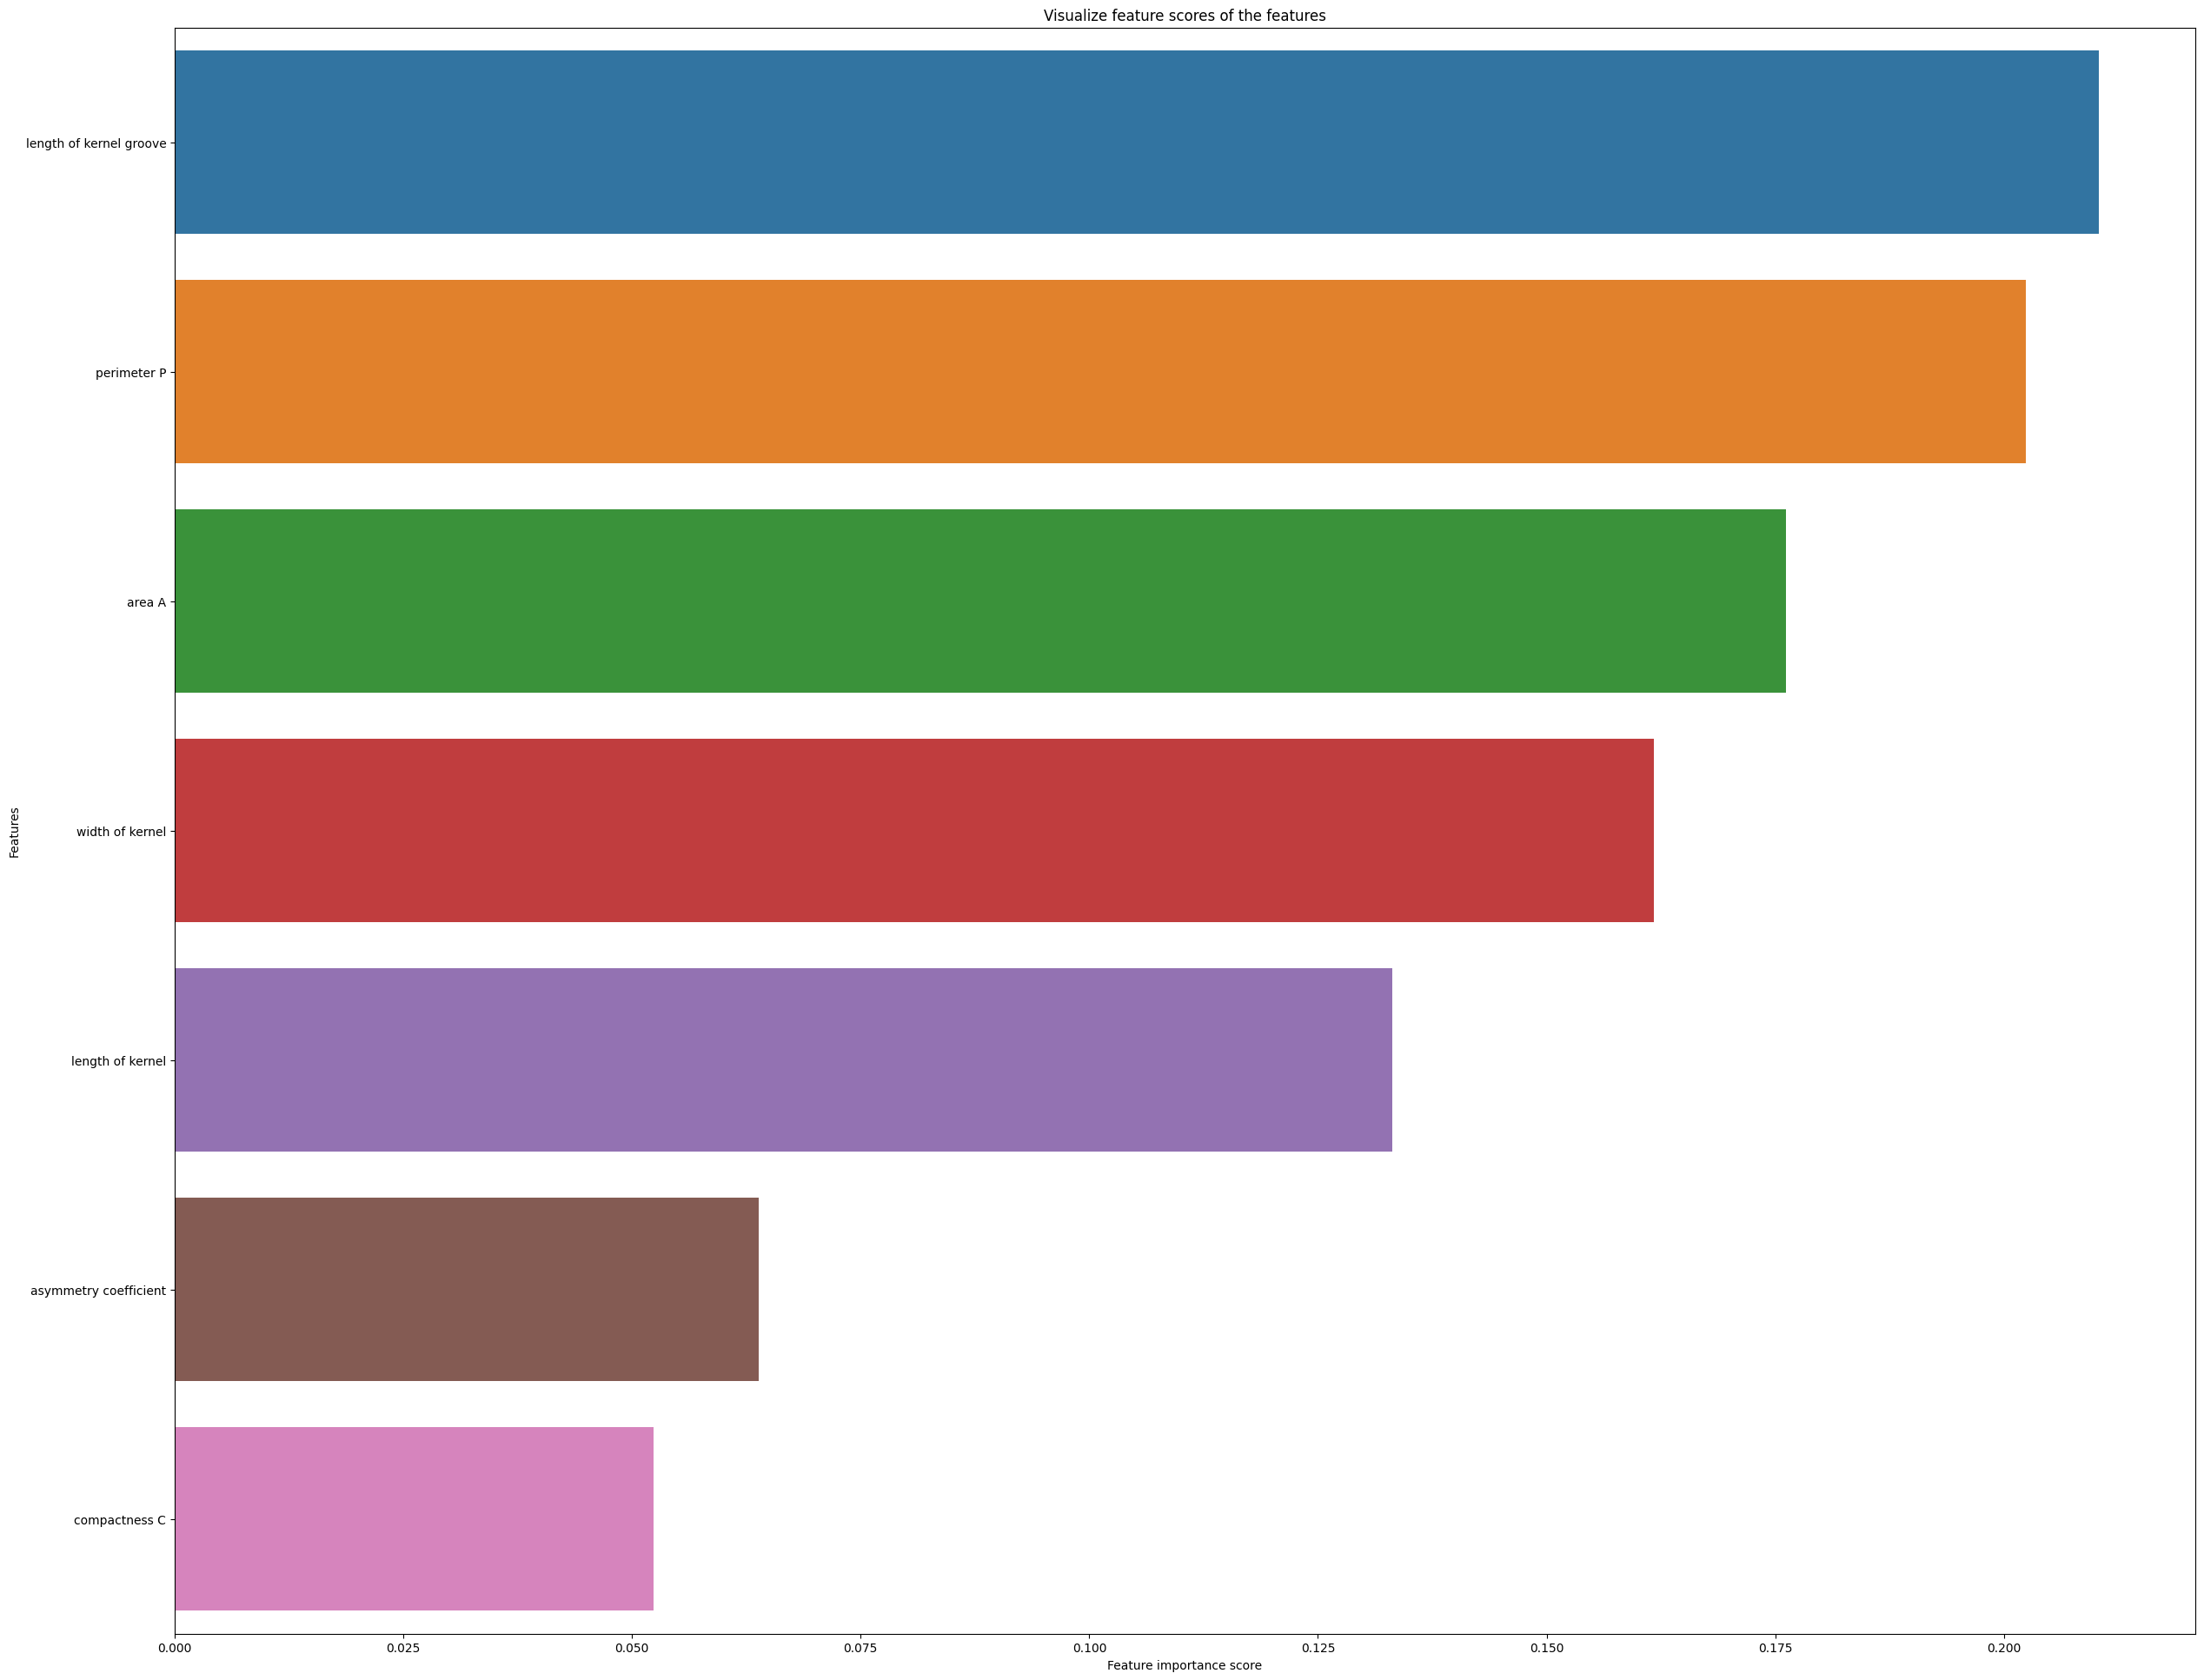

In [102]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

# **Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set (try to get above 80% accuracy). Once you have found a good one, try it on the test set. Describe and discuss your findings.**

I have implndemented an Ensemble Classifier and Stacking

The combined classifiers are tuned with best performing models hyperparameters.

In [115]:
from sklearn.ensemble import VotingClassifier,StackingClassifier

clf1 = LogisticRegression(multi_class='multinomial', C= 0.05, max_iter= 50, solver= 'lbfgs')

clf2 = SVC(C= 10, gamma= 'scale', kernel= 'linear',probability=True)

clf2_poly = SVC(C= 3, degree= 4, coef0 =1, kernel= 'poly', probability = True)

clf3 = RandomForestClassifier( max_depth= None, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100)

ensemble_clf = VotingClassifier(estimators=[('lr', clf1), ('svm_poly',clf2_poly), ('rf', clf3)], voting='hard')

stacking_clf = StackingClassifier(estimators=[('lr', clf1),('svm_poly',clf2_poly), ('rf', clf3)],final_estimator=clf2_poly)


ensemble_clf.fit(X_train, y_train)

print("Ensemble")
print("Validation\n")
evaluate_model(ensemble_clf, X_valid, y_valid)
print("Test\n")
evaluate_model(ensemble_clf, X_test, y_test)

stacking_clf.fit(X_train, y_train)


print("Stacking")
print("Validation\n")
evaluate_model(stacking_clf, X_valid, y_valid)
print("Test\n")
evaluate_model(stacking_clf, X_test, y_test)

Ensemble
Validation

              precision    recall  f1-score   support

           1       1.00      0.87      0.93        15
           2       0.94      1.00      0.97        16
           3       0.92      1.00      0.96        11

    accuracy                           0.95        42
   macro avg       0.95      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42

Test

              precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.92      1.00      0.96        11
           3       0.93      0.82      0.87        17

    accuracy                           0.88        42
   macro avg       0.88      0.89      0.89        42
weighted avg       0.88      0.88      0.88        42

Stacking
Validation

              precision    recall  f1-score   support

           1       1.00      0.87      0.93        15
           2       0.94      1.00      0.97        16
           3       0.92    

# **Discussion**


1) Accuracy of the Ensemble is 85 and 95 for validation. Which is Greater than the 3 classifiers which have 95 or lesser accuracy on test and val data

2) The stacking classifier gives better results that the Hard voting classifier. As expected as a stacking classifier typically gives better results than a hard voting classifier because it leverages the strengths of multiple base classifiers to make predictions.

3) Eventhought some classifiers can match the accuracy of the ensemble on the validation set. They fail to do so on the test set. So the Ensemble Classifiers perform much better than the individual ones.

4) Stacking in particular gives better results.

# **Refernces:**
[Dataset Paper](https://www.hindawi.com/journals/sp/2022/2626868/)

[Dataset](https://archive.ics.uci.edu/dataset/236/seeds)

[Kaggle](https://www.kaggle.com)

[Sci-kit Learn](https://scikit-learn.org)
